### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the Loan Data

In [3]:
loan_data = pd.read_csv(r'C:\Users\jjsun\OneDrive\Desktop\pythonprojects\LendingClub-Loan_Default-Prediction\data\raw\Loan_status_2007-2020Q3.gzip')

C:\Users\jjsun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# print([column for column in df_scan.columns])
# features = [feature for feature in df_scan.columns if feature not in ['Unnamed: 0', 'id']]
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(1), object(35)
memory usage: 3.1+ GB


In [5]:
loan_data.head(5)

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [6]:
loan_data.describe()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,2.925493e+06,2.925492e+06,2.925492e+06,2.925492e+06,2.925492e+06,2.925488e+06,2.922384e+06,2.925463e+06,2.925492e+06,2.925492e+06,...,197824.000000,197824.000000,197824.000000,143638.000000,182076.000000,143638.000000,143637.000000,179240.000000,182076.000000,182076.000000
mean,8.697419e+04,1.535878e+04,1.535470e+04,1.534005e+04,4.523914e+02,7.993727e+04,1.929648e+01,2.897012e-01,7.005110e+02,7.045112e+02,...,12.544398,0.038327,0.067545,2.233427,119.887400,2.233427,2.323148,369.367460,11993.128927,745.504875
std,8.048842e+04,9.478383e+03,9.477145e+03,9.480634e+03,2.729478e+02,1.117476e+05,1.571977e+01,8.436819e-01,3.376565e+01,3.376653e+01,...,8.206977,0.362390,0.371836,0.565689,247.522976,0.565689,6.179453,468.696526,9162.902724,2095.316599
min,0.000000e+00,5.000000e+02,5.000000e+02,0.000000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,6.140000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.284100e+04,8.000000e+03,8.000000e+03,8.000000e+03,2.535000e+02,4.700000e+04,1.208000e+01,0.000000e+00,6.750000e+02,6.790000e+02,...,7.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,104.280000,4749.142500,259.040000
50%,6.892500e+04,1.300000e+04,1.300000e+04,1.300000e+04,3.823000e+02,6.600000e+04,1.810000e+01,0.000000e+00,6.950000e+02,6.990000e+02,...,11.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,249.474420,9967.160000,423.200000
75%,1.072940e+05,2.000000e+04,2.000000e+04,2.000000e+04,6.039200e+02,9.500000e+04,2.488000e+01,0.000000e+00,7.200000e+02,7.240000e+02,...,17.000000,0.000000,0.000000,2.000000,101.940000,2.000000,0.000000,482.532500,17640.670000,679.580000
max,4.210940e+05,4.000000e+04,4.000000e+04,4.000000e+04,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,8.500000e+02,...,121.000000,21.000000,23.000000,4.000000,2797.500000,4.000000,82.000000,11581.820000,42135.550000,40270.980000


### Missing Values

In [7]:
missing = pd.concat([loan_data.isnull().sum().sort_values(ascending = False), 100 * loan_data.isnull().mean().sort_values(ascending = False)], axis=1)
missing.columns=['count', '%']
print(missing)

                        count          %
hardship_loan_status  2782082  95.097886
hardship_reason       2781861  95.090332
hardship_status       2781858  95.090229
hardship_dpd          2781856  95.090161
hardship_type         2781855  95.090127
...                       ...        ...
last_fico_range_low         1   0.000034
policy_code                 1   0.000034
funded_amnt                 1   0.000034
id                          0   0.000000
Unnamed: 0                  0   0.000000

[142 rows x 2 columns]


### Categorical Features

In [8]:
loan_data.select_dtypes('object').head()

,id,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,...,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag
0,1077501,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-2011,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1077430,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-2011,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,1077175,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-2011,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,1076863,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-2011,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,1075358,60 months,12.69%,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-2011,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [10]:
df_scan.purpose.value_counts()

debt_consolidation    1638058
credit_card            695665
home_improvement       193000
other                  177488
major_purchase          62685
medical                 35295
small_business          29976
car                     29803
vacation                20196
house                   19596
moving                  19184
wedding                  2355
renewable_energy         1767
educational               424
Name: purpose, dtype: int64

<AxesSubplot:>

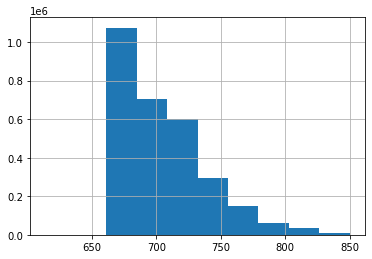

In [19]:
df_scan.fico_range_high.hist()